# Task 1: Initial Exploration & Cleaning
• Load and explore the dataset using Pandas.
• Check for missing values, data types, and unique values in each column.
• Clean any inconsistencies, such as missing dates or negative values where they shouldn't be.

In [21]:
# Importing Releven Libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [11]:
#Reading the csv file
df=pd.read_csv('construction_project_progress_data.csv')

In [12]:
#Checking  data structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ProjectID           100 non-null    int64  
 1   ProjectName         100 non-null    object 
 2   Stage               100 non-null    object 
 3   Substage            100 non-null    object 
 4   StartDate           100 non-null    object 
 5   PlannedEndDate      100 non-null    object 
 6   ActualEndDate       71 non-null     object 
 7   ProgressPercentage  100 non-null    float64
 8   BudgetAllocated     100 non-null    int64  
 9   BudgetUtilized      100 non-null    float64
 10  TeamAssigned        100 non-null    object 
 11  RiskLevel           100 non-null    object 
 12  IssuesReported      100 non-null    int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 10.3+ KB
None


In [ ]:
#Checking Null values
print(df.isnull().sum())

ProjectID              0
ProjectName            0
Stage                  0
Substage               0
StartDate              0
PlannedEndDate         0
ActualEndDate         29
ProgressPercentage     0
BudgetAllocated        0
BudgetUtilized         0
TeamAssigned           0
RiskLevel              0
IssuesReported         0
dtype: int64


In [16]:
# Replacing null values in Actual end date with Planned end date
df['ActualEndDate'].fillna(df['PlannedEndDate'],inplace=True)

In [19]:
# Correcting Data types of Columns containg Dates
df['ActualEndDate']=pd.to_datetime(df['ActualEndDate'])
df['StartDate']=pd.to_datetime(df['StartDate'])
df['PlannedEndDate']=pd.to_datetime(df['PlannedEndDate'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ProjectID           100 non-null    int64         
 1   ProjectName         100 non-null    object        
 2   Stage               100 non-null    object        
 3   Substage            100 non-null    object        
 4   StartDate           100 non-null    datetime64[ns]
 5   PlannedEndDate      100 non-null    datetime64[ns]
 6   ActualEndDate       100 non-null    datetime64[ns]
 7   ProgressPercentage  100 non-null    float64       
 8   BudgetAllocated     100 non-null    int64         
 9   BudgetUtilized      100 non-null    float64       
 10  TeamAssigned        100 non-null    object        
 11  RiskLevel           100 non-null    object        
 12  IssuesReported      100 non-null    int64         
dtypes: datetime64[ns](3), float64(2), int64(3), object(

In [24]:
print(df.nunique())

ProjectID              69
ProjectName             4
Stage                   3
Substage                9
StartDate              88
PlannedEndDate         87
ActualEndDate          89
ProgressPercentage     99
BudgetAllocated       100
BudgetUtilized        100
TeamAssigned            5
RiskLevel               3
IssuesReported         11
BudgetEfficiency      100
dtype: int64


# Task 2: Calculating Budget Efficiency
• Objective: Evaluate budget efficiency across projects.
• Instructions:
o Calculate a budget efficiency ratio: [BudgetUtilized/BudgetAllocated]
o Identify projects that exceeded their budget.
o Analyze if specific project types tend to have higher budget utilization.

In [37]:
#Calculating Budget Effinciency column and rounding off to 3 significant digits
df['BudgetEfficiency'] = (df['BudgetUtilized'] / df['BudgetAllocated']).round(3)

In [46]:
# Creating a Function to check project with budget effincinecy higher
def show_projects(df):
    high_efficiency_projects = df[df["BudgetEfficiency"] > 1]
    
    if not high_efficiency_projects.empty:
        print("Projects with Budget Efficiency greater than 1:")
        print(high_efficiency_projects["ProjectID"].to_string(index=False))
    else:
        print("No projects exceed their budget")

# Run the function to display project IDs
show_projects(df)

No projects exceed their budget


# Task 3: Visualizing Project Progress & Delays
• Objective: Visualize project progress by analyzing ProgressPercentage and Delays.
• Instructions:
o Use a histogram to show the distribution of ProgressPercentage.
o Plot a bar chart comparing Delays across different project stages.
o Create a box plot to understand the spread of delays by RiskLevel.

In [51]:
#Creating a Delays Columns
df['Delays'] = (df['ActualEndDate'] - df['PlannedEndDate']).dt.days
# Recording only Positve Delay values
Delays=df[df['Delays']>0]
# Average Delays by Stage
stage_delays = Delays.groupby('Stage')['Delays'].mean().reset_index()
print(stage_delays)

          Stage    Delays
0  Construction  5.166667
1   Engineering  3.857143
2   Procurement  3.714286


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

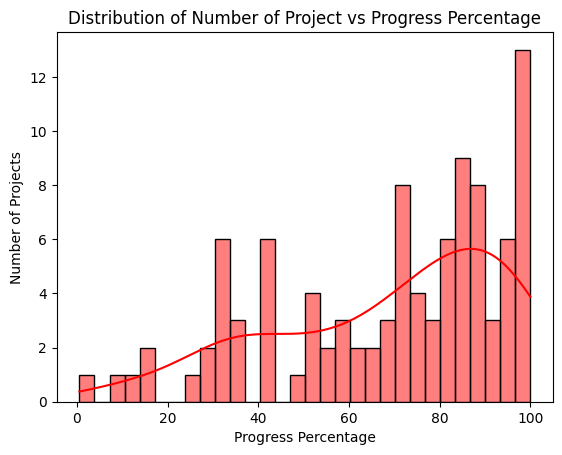

In [66]:
sns.histplot(df['ProgressPercentage'], bins=30,kde=True, color='red', edgecolor='black')
plt.xlabel('Progress Percentage')
plt.ylabel('Number of Projects')
plt.title('Distribution of Number of Project vs Progress Percentage')
plt.show()

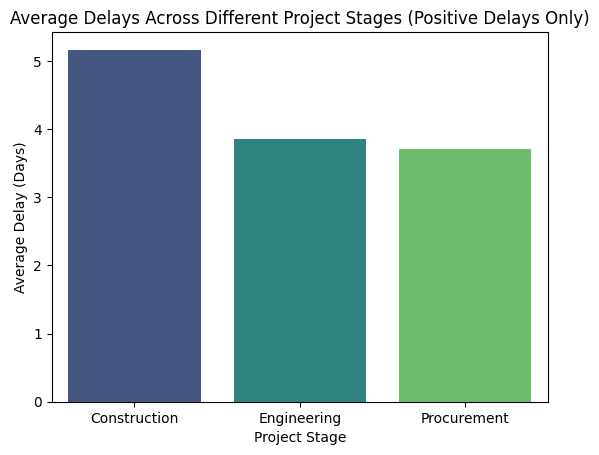

In [64]:
sns.barplot(x='Stage',y='Delays',data=stage_delays, palette='viridis')
plt.title('Average Delays Across Different Project Stages (Positive Delays Only)')
plt.xlabel('Project Stage')
plt.ylabel('Average Delay (Days)')
plt.show()

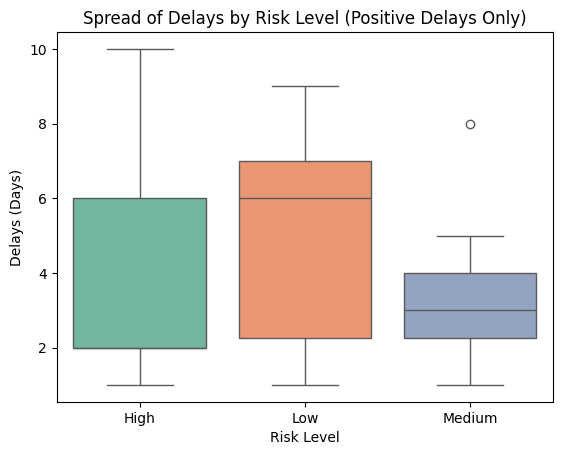

In [74]:
sns.boxplot(x='RiskLevel', y='Delays', data=Delays,palette='Set2')
plt.title('Spread of Delays by Risk Level (Positive Delays Only)')
plt.xlabel('Risk Level')
plt.ylabel('Delays (Days)')
plt.show()

# Task 4: Statistical Summary & Hypothesis Testing
• Objective: Perform basic statistical analysis and hypothesis testing.
• Instructions:
o Calculate summary statistics for numerical columns.
o Compare BudgetAllocated and BudgetUtilized between High and Low Risk projects using a t-test.
o Comment on whether higher-risk projects tend to have a larger variance in budget utilization.

In [80]:
num_df=df[['ProgressPercentage','BudgetAllocated','BudgetUtilized','IssuesReported','BudgetEfficiency','Delays']]
num_df.describe()

,ProgressPercentage,BudgetAllocated,BudgetUtilized,IssuesReported,BudgetEfficiency,Delays
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,68.880200,302295.670000,213635.655400,4.960000,0.688860,-0.900000
std,25.501399,116966.241952,123524.269049,2.984539,0.255017,5.137503
min,0.560000,102021.000000,2323.840000,0.000000,0.006000,-10.000000
25%,51.740000,213635.500000,117550.377500,3.000000,0.517000,-5.000000
50%,75.435000,296502.000000,200698.275000,5.000000,0.754500,0.000000
75%,88.950000,403444.500000,317117.642500,7.000000,0.889250,2.000000
max,99.980000,496017.000000,464222.720000,10.000000,1.000000,10.000000


In [81]:
grouped_mean_budget_utilized = df.groupby('RiskLevel')['BudgetUtilized'].mean().round()
print(grouped_mean_budget_utilized)

RiskLevel
High      200589.0
Low       220541.0
Medium    221497.0
Name: BudgetUtilized, dtype: float64


In [82]:
grouped_mean_budget_allocated = df.groupby('RiskLevel')['BudgetAllocated'].mean().round()
print(grouped_mean_budget_allocated)

RiskLevel
High      292196.0
Low       304484.0
Medium    312192.0
Name: BudgetAllocated, dtype: float64


In [83]:
from scipy import stats
high_risk = df[df['RiskLevel'] == 'High']
low_risk = df[df['RiskLevel'] == 'Low']

In [84]:
# T-test for BudgetAllocated
t_stat_allocated, p_value_allocated = stats.ttest_ind(
    high_risk['BudgetAllocated'], 
    low_risk['BudgetAllocated'], 
    equal_var=False  # Welch's t-test for unequal variance
)

# T-test for BudgetUtilized
t_stat_utilized, p_value_utilized = stats.ttest_ind(
    high_risk['BudgetUtilized'], 
    low_risk['BudgetUtilized'], 
    equal_var=False  # Welch's t-test for unequal variance
)

# Print the results
print("T-test for BudgetAllocated:")
print("T-statistic:", t_stat_allocated)
print("P-value:", p_value_allocated)

print("\nT-test for BudgetUtilized:")
print("T-statistic:", t_stat_utilized)
print("P-value:", p_value_utilized)


T-test for BudgetAllocated:
T-statistic: -0.4371385523418501
P-value: 0.6634528310359855

T-test for BudgetUtilized:
T-statistic: -0.6932053413098939
P-value: 0.4906225580839958


In [85]:
# Calculate variance in BudgetUtilized for both risk levels
variance_high_utilized = high_risk['BudgetUtilized'].var()
variance_low_utilized = low_risk['BudgetUtilized'].var()

print("\nVariance in BudgetUtilized:")
print("High Risk Projects:", variance_high_utilized)
print("Low Risk Projects:", variance_low_utilized)

# Comment on variance comparison
if variance_high_utilized > variance_low_utilized:
    print("\nHigh-risk projects tend to have a larger variance in budget utilization.")
else:
    print("\nHigh-risk projects do not show a larger variance in budget utilization compared to low-risk projects.")



Variance in BudgetUtilized:
High Risk Projects: 11808142466.537628
Low Risk Projects: 17514715432.793842

High-risk projects do not show a larger variance in budget utilization compared to low-risk projects.


# Task 5: Visualizing Issues & Risk
• Objective: Examine relationships between issues reported and risk levels.
• Instructions:
o Create a scatter plot of IssuesReported vs. BudgetUtilized with color differentiation for RiskLevel.
o Use a heatmap to show correlations among numeric columns, focusing on ProgressPercentage, BudgetUtilized, Delays, and IssuesReported.

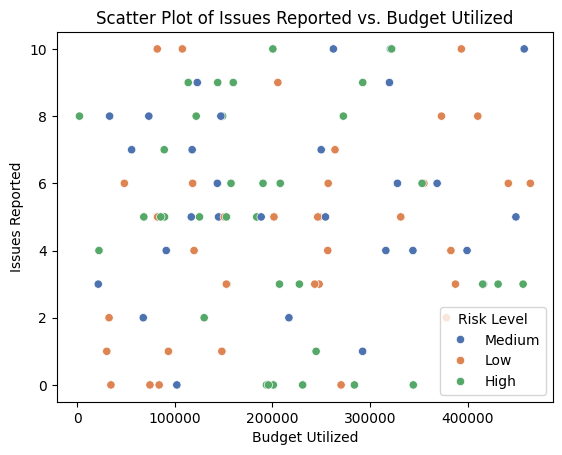

In [87]:
# Scatter plot of IssuesReported vs. BudgetUtilized colored by RiskLevel
sns.scatterplot(data=df, x='BudgetUtilized', y='IssuesReported', hue='RiskLevel', palette='deep')
plt.title('Scatter Plot of Issues Reported vs. Budget Utilized')
plt.xlabel('Budget Utilized')
plt.ylabel('Issues Reported')
plt.legend(title='Risk Level')
plt.show()

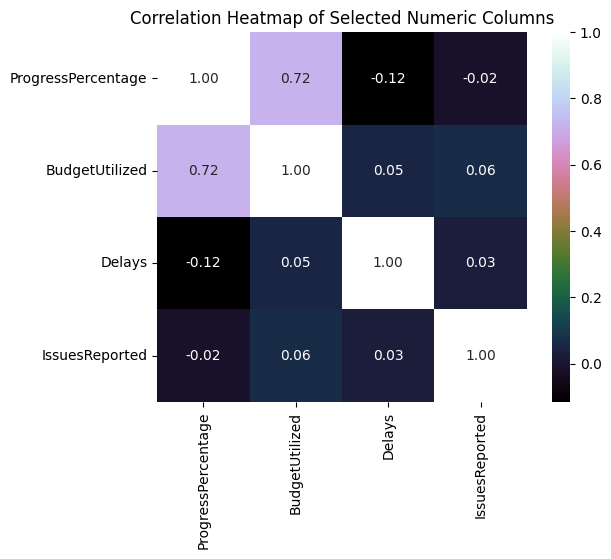

In [101]:
# Selecting relevant numeric columns
correlation_data = df[['ProgressPercentage', 'BudgetUtilized', 'Delays', 'IssuesReported']]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Heatmap to show correlations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='cubehelix', square=True)
plt.title('Correlation Heatmap of Selected Numeric Columns')
plt.show()


# Task 6: Project Performance Analysis
• Objective: Identify factors impacting project performance.
• Instructions:
o Calculate the mean ProgressPercentage for projects in each Stage.
o Determine the top 3 stages with the highest average ProgressPercentage.
o Create a pie chart to show the proportion of Status (e.g., On Track, Delayed) across projects.

In [111]:
mean_progress = df.groupby('Stage')['ProgressPercentage'].mean().reset_index()

# Determine the top 3 stages with the highest average ProgressPercentage
top_stages = mean_progress.nlargest(3, 'ProgressPercentage')
print("Top 3 Stages with Highest Average Progress Percentage:")
print(top_stages)

Top 3 Stages with Highest Average Progress Percentage:
          Stage  ProgressPercentage
1   Engineering           89.041515
2   Procurement           76.707500
0  Construction           42.714571


In [104]:
# Create the Status column based on the Delays column
df['Status'] = df['Delays'].apply(lambda x: 'On Track' if x <= 0 else 'Delayed')

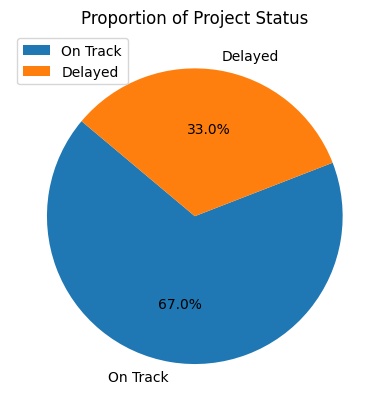

In [108]:
# Count the number of occurrences of each Status
status_counts = df['Status'].value_counts()

# Create a pie chart to show the proportion of Status across projects
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Project Status')
plt.legend()
plt.show()